## Task 1

# solving the diffusion equation in 'r'

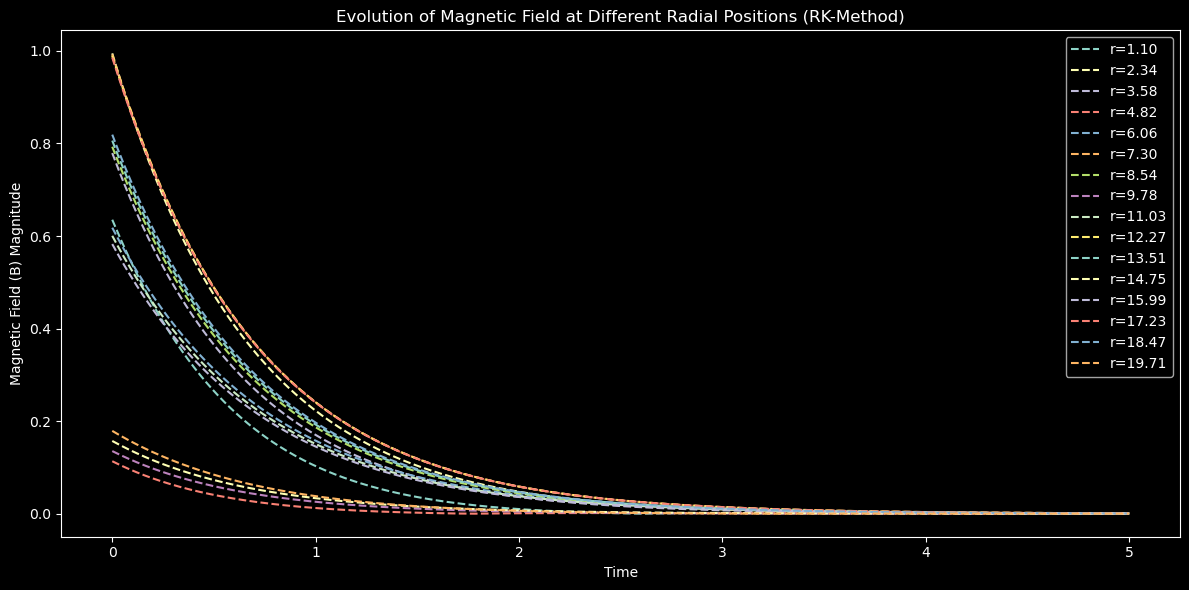

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('dark_background')

# Parameters of the equations
 # Turbulent magnetic diffusivity 
eta_diffusivity = 0.5
# Radial grid
R_max = 20  # Maximum radial distance
N_grid = 200  # Number of grid points in radial direction 
d_r = R_max / N_grid

# Time parameters
Total_Time= 5.0  # Total time (increased)
N_t = 500  # Number of time steps (increased)
d_t = Total_Time/ N_t

# Initialize magnetic field B (considering only the radial component) with different initial values
r= np.linspace(1, R_max, N_grid)
# Initial value: Let's say a sinusoidal initial field
np.random.seed(42)
initial_Br = np.sin(4*np.pi*r/R_max)
H = 1

# Function to compute the radial Laplacian of B
def Laplacian_of(r, Br):
    return (np.gradient((1/r)*np.gradient(r*Br, d_r), d_r) - ((np.pi)**2)/(4*H**2) * Br)

# Runge-Kutta method for solving the diffusion equation
def RK_time_step(r, Br, d_t):
    k1 = d_t * eta_diffusivity * Laplacian_of(r, Br)
    k2 = d_t * eta_diffusivity * Laplacian_of(r+ 0.5 * k1, Br + 0.5 * k1)
    k3 = d_t * eta_diffusivity * Laplacian_of(r+ 0.5 * k2, Br + 0.5 * k2)
    k4 = d_t * eta_diffusivity * Laplacian_of(r+ k3, Br + k3)
    return Br + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Array to store the evolution of magnetic field at different radial positions
evolution_at_r = np.zeros((N_t + 1, N_grid))

# Time-stepping scheme using Runge-Kutta
magnetic_field = np.copy(initial_Br)
for t in range(N_t + 1):
    evolution_at_r[t, :] = magnetic_field
    magnetic_field = RK_time_step(r, magnetic_field, d_t)

# Plot the evolution of magnetic field at different radial positions over time
plt.figure(figsize=(12, 6))
for i in range(1, N_grid, N_grid//15):
    plt.plot(np.linspace(0, Total_Time, N_t + 1), np.abs(evolution_at_r[:, i]), label=f'r={r[i]:.2f}', linestyle='--')
    
plt.xlabel('Time')
plt.ylabel('Magnetic Field (B) Magnitude')
plt.title('Evolution of Magnetic Field at Different Radial Positions (RK-Method)')
plt.legend()
plt.tight_layout()
plt.show()


# Explore the evolution of the magnetic field magnitude and of the exponential decay rate.

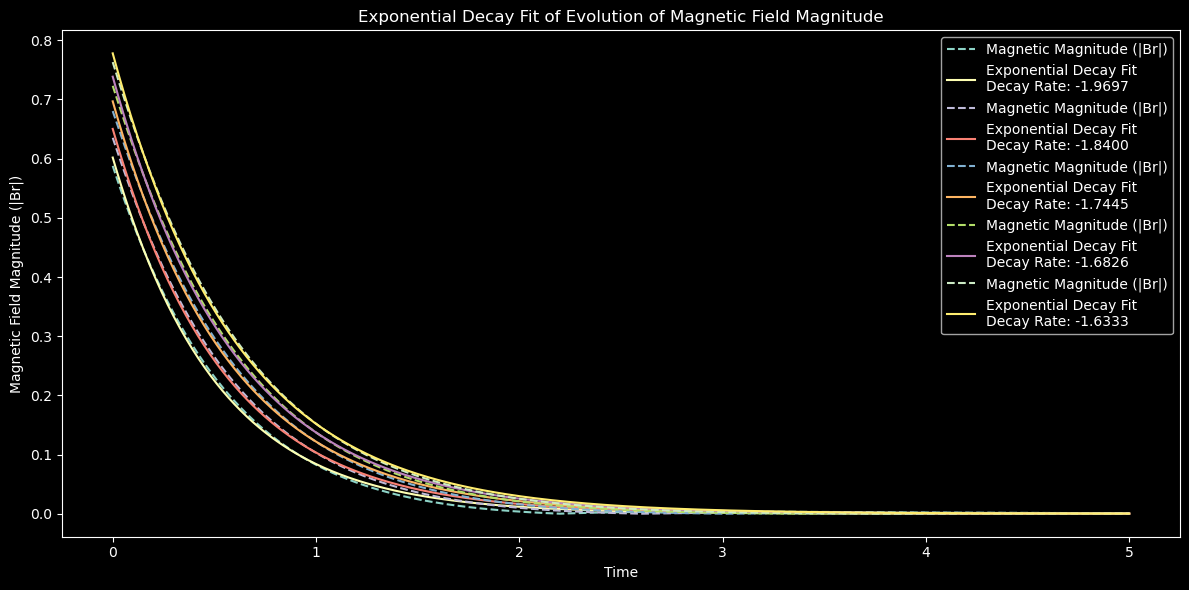

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define a function for exponential decay
def Expo_decay_func(t, amplitude, decay_rate):
    return amplitude * np.exp(decay_rate * t)

# Extract time and magnetic field magnitude data
Time = np.linspace(0, Total_Time, N_t + 1)

# Plotting the fit
plt.figure(figsize=(12, 6))
for i in range(5):
    B_magnitude = np.abs(evolution_at_r[:, i])  # Magnitude at a specific radial position
    plt.plot(Time, B_magnitude, label='Magnetic Magnitude (|Br|)', linestyle='--')
    # Fit the data to the exponential decay model
    fit_params, _ = curve_fit(Expo_decay_func, Time, B_magnitude)
    plt.plot(Time, Expo_decay_func(Time, *fit_params),  label=f'Exponential Decay Fit\nDecay Rate: {fit_params[1]:.4f}')
plt.xlabel('Time')
plt.ylabel('Magnetic Field Magnitude (|Br|)')
plt.title('Exponential Decay Fit of Evolution of Magnetic Field Magnitude')
plt.legend()
plt.tight_layout()
plt.show()


# Explore the evolution of the spatial solution for Br and Bφ, and of the pitch angle of the mean magnetic field

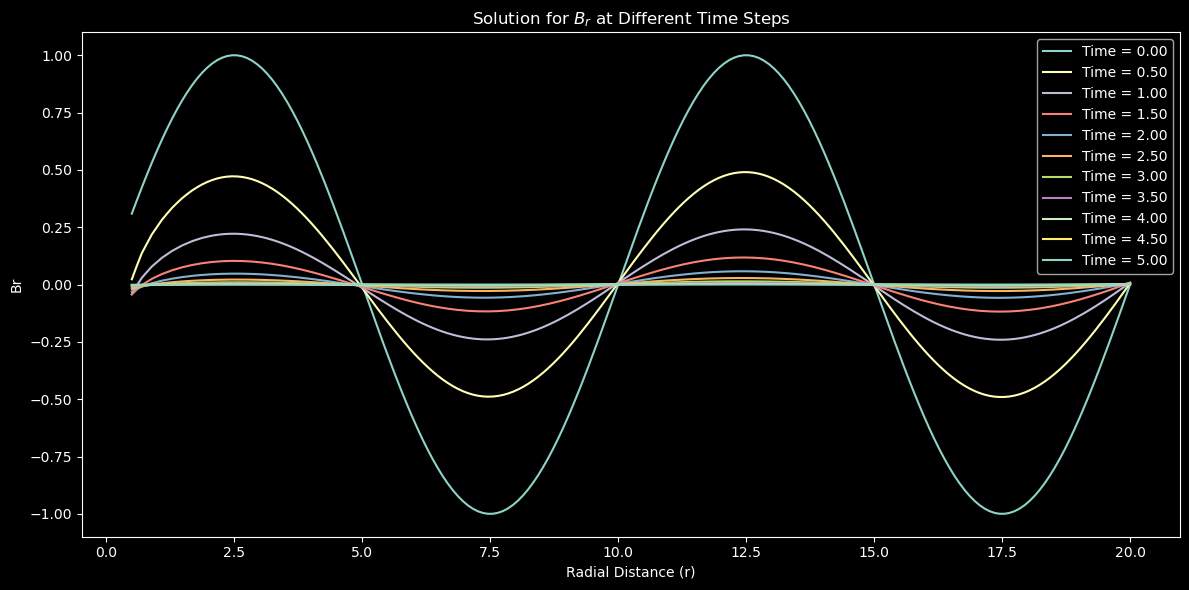

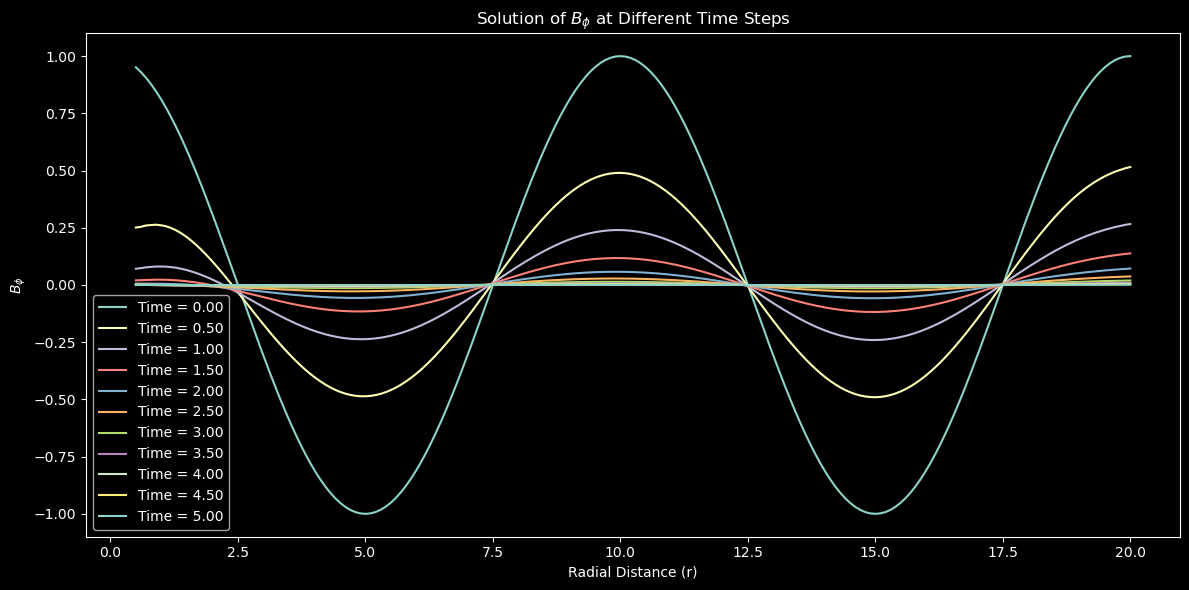

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize magnetic field B (considering both radial and azimuthal components)
R = np.linspace(0.5, R_max, N_grid)
Br = np.sin(4 * np.pi * R / R_max)
Bphi = np.cos(4 * np.pi * R / R_max)   # Initialize azimuthal component as zero



# Runge-Kutta method for solving the diffusion equation
def RK_step_diff(R,Br, Bphi, d_t):
    k1_Br = d_t * eta_diffusivity * Laplacian_of(R,Br)
    k1_Bphi = d_t * eta_diffusivity * Laplacian_of(R,Bphi)

    k2_Br = d_t * eta_diffusivity * Laplacian_of(R + 0.5*k1_Br,Br + 0.5 * k1_Br)
    k2_Bphi = d_t * eta_diffusivity * Laplacian_of(R + 0.5*k1_Bphi,Bphi + 0.5 * k1_Bphi)

    k3_Br = d_t * eta_diffusivity * Laplacian_of(R + 0.5*k2_Br,Br + 0.5 * k2_Br)
    k3_Bphi = d_t * eta_diffusivity * Laplacian_of(R + 0.5*k2_Bphi,Bphi + 0.5 * k2_Bphi)

    k4_Br = d_t * eta_diffusivity * Laplacian_of(R + k3_Br,Br + k3_Br)
    k4_Bphi = d_t * eta_diffusivity * Laplacian_of(R + k3_Bphi,Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Store the evolution of magnetic field components at different time steps
evolution_Br = np.zeros((N_t + 1, N_grid))
evolution_Bphi = np.zeros((N_t + 1, N_grid))

# Time-stepping scheme using Runge-Kutta
for t in range(N_t + 1):
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br, Bphi = RK_step_diff(R,Br, Bphi, d_t)

# Plot for Br
plt.figure(figsize=(12, 6))
for t in range(0, N_t + 1, N_t // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Br[t, :], label=f'Time = {t * d_t:.2f}')
plt.xlabel('Radial Distance (r)')
plt.ylabel('Br')
plt.title('Solution for $B_r$ at Different Time Steps')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for Bphi
plt.figure(figsize=(12, 6))
for t in range(0, N_t + 1, N_t // 10):  
    plt.plot(R, evolution_Bphi[t, :], label=f'Time = {t * d_t:.2f}')
plt.xlabel('Radial Distance (r)')
plt.ylabel('$B_{\phi}$')
plt.title('Solution of $B_{\phi}$ at Different Time Steps')
plt.legend()
plt.tight_layout()
plt.show()


Pitch angle evolution

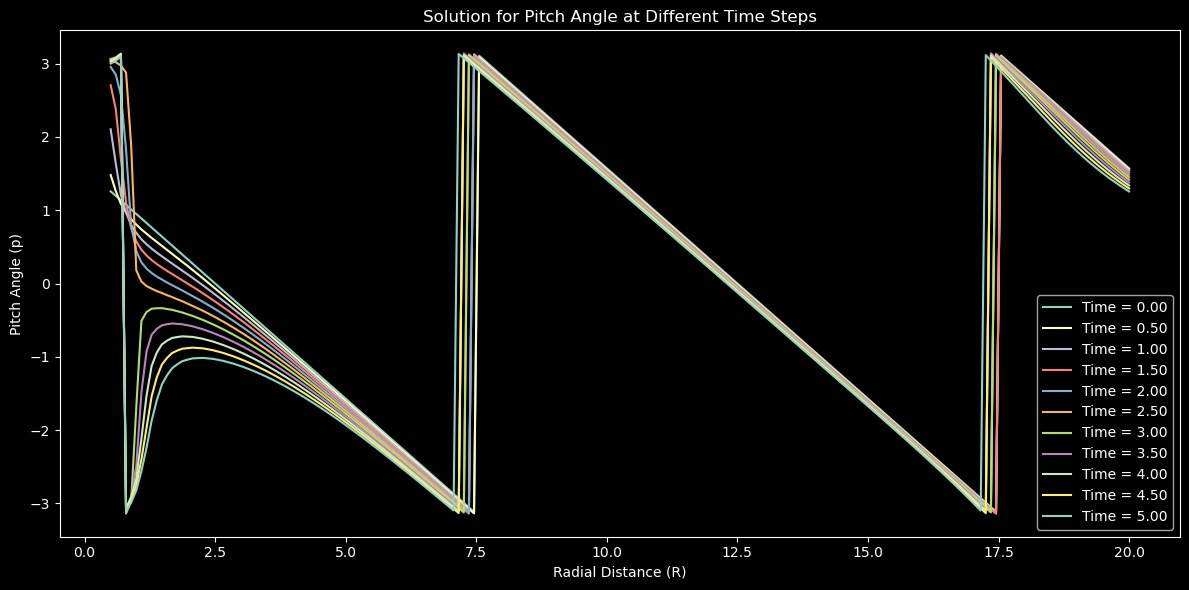

In [4]:
def pitchangle_compute(Br, Bphi):
    return np.arctan2(Bphi, Br)

# Store the evolution of pitch angle at different time steps
pitchangle_evolve = np.zeros((N_t + 1, N_grid))

# Time-stepping scheme using Runge-Kutta
for t in range(N_t + 1):
    pitchangle_evolve[t, :] = pitchangle_compute(evolution_Br[t, :], evolution_Bphi[t, :])

# Plot the spatial solution for the pitch angle
plt.figure(figsize=(12, 6))
for t in range(0, N_t + 1, N_t // 10):  # Plot every 10th time step
    plt.plot(R, pitchangle_evolve[t, :], label=f'Time = {t * d_t:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Pitch Angle (p)')
plt.title('Solution for Pitch Angle at Different Time Steps')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']